# Feature Selection

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
import missingno as msno

url = 'https://raw.githubusercontent.com/TQuangNLe2003/DS102_HMTK/main/%C4%90%E1%BB%93%20%C3%81n/WA_Fn-UseC_-HR-Employee-Attrition.csv'
df = pd.read_csv(url)

## Method 1: The Recursive Feature Elimination (RFE)

In [3]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


features = df.drop('Attrition', axis=1)
target = df['Attrition']

# Mã hóa các cột phân loại
features_encoded = pd.get_dummies(features,drop_first=True)

# Scale dữ liệu
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_encoded)

# Sử dụng mô hình Logistic Regression cho việc chọn feature
model = LogisticRegression(max_iter=1000)

# Khởi tạo RFE với mô hình Logistic Regression
rfe = RFE(model, n_features_to_select=20)

# Fit RFE trên dữ liệu đã được scale
rfe.fit(scaled_features, target)

# Lấy các đặc trưng được chọn và thứ hạng
selected_features = features_encoded.columns[rfe.support_]
feature_ranking = rfe.ranking_

# In ra các thứ hạng
print("Các feature được chọn và thứ hạng tương ứng:")
for feature, rank in zip(features_encoded.columns, feature_ranking):
    print(f"Feature: {feature}, Rank: {rank}")


print(rfe.support_)
print(rfe.ranking_)

Các feature được chọn và thứ hạng tương ứng:
Feature: Age, Rank: 1
Feature: DailyRate, Rank: 15
Feature: DistanceFromHome, Rank: 1
Feature: Education, Rank: 26
Feature: EmployeeCount, Rank: 27
Feature: EmployeeNumber, Rank: 16
Feature: EnvironmentSatisfaction, Rank: 1
Feature: HourlyRate, Rank: 25
Feature: JobInvolvement, Rank: 1
Feature: JobLevel, Rank: 17
Feature: JobSatisfaction, Rank: 1
Feature: MonthlyIncome, Rank: 24
Feature: MonthlyRate, Rank: 21
Feature: NumCompaniesWorked, Rank: 1
Feature: PercentSalaryHike, Rank: 18
Feature: PerformanceRating, Rank: 22
Feature: RelationshipSatisfaction, Rank: 3
Feature: StandardHours, Rank: 28
Feature: StockOptionLevel, Rank: 9
Feature: TotalWorkingYears, Rank: 1
Feature: TrainingTimesLastYear, Rank: 8
Feature: WorkLifeBalance, Rank: 2
Feature: YearsAtCompany, Rank: 1
Feature: YearsInCurrentRole, Rank: 1
Feature: YearsSinceLastPromotion, Rank: 1
Feature: YearsWithCurrManager, Rank: 1
Feature: BusinessTravel_Travel_Frequently, Rank: 1
Feature:

In [4]:
features_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 47 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   DailyRate                          1470 non-null   int64
 2   DistanceFromHome                   1470 non-null   int64
 3   Education                          1470 non-null   int64
 4   EmployeeCount                      1470 non-null   int64
 5   EmployeeNumber                     1470 non-null   int64
 6   EnvironmentSatisfaction            1470 non-null   int64
 7   HourlyRate                         1470 non-null   int64
 8   JobInvolvement                     1470 non-null   int64
 9   JobLevel                           1470 non-null   int64
 10  JobSatisfaction                    1470 non-null   int64
 11  MonthlyIncome                      1470 non-null   int64
 12  MonthlyRate         

In [5]:
print("Các thuộc tính đã chọn:")
print(selected_features)

Các thuộc tính đã chọn:
Index(['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobSatisfaction', 'NumCompaniesWorked', 'TotalWorkingYears',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'EducationField_Life Sciences',
       'EducationField_Medical', 'JobRole_Laboratory Technician',
       'JobRole_Research Director', 'JobRole_Sales Representative',
       'MaritalStatus_Single', 'OverTime_Yes'],
      dtype='object')


## Method 2: Multicollinearity removal

### Loại bỏ mốt số thuộc tính không quan trọng

In [6]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
df = pd.read_csv(url)

In [7]:
# Lọc ra các biến phân loại (object)
categorical_columns = df.select_dtypes(include=['object']).columns

# Tạo danh sách các biến có chỉ một giá trị duy nhất
single_value_categoricals = []

for col in categorical_columns:
    if df[col].nunique() == 1:
        single_value_categoricals.append(col)

# In ra danh sách các biến phân loại có chỉ một giá trị duy nhất
if single_value_categoricals:
    print("Biến phân loại chỉ có một giá trị duy nhất:")
    for col in single_value_categoricals:
        print(col)
else:
    print("Không có biến phân loại nào có chỉ một giá trị duy nhất.")

Biến phân loại chỉ có một giá trị duy nhất:
Over18


In [8]:
# Lọc ra các biến số (numerical variables)
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Tạo DataFrame chỉ chứa các biến số số học
numerical_df = df[numerical_columns]

# Áp dụng VarianceThreshold với ngưỡng là 0.1
threshold = 0.1
selector = VarianceThreshold(threshold=threshold)

# Lọc các biến số không đáp ứng ngưỡng
rejected_features = selector.fit_transform(numerical_df)

# Lấy danh sách các biến số đã chọn sau khi áp dụng ngưỡng
selected_features = numerical_df.columns[~selector.get_support()].tolist()

print("Các biến số không đáp ứng ngưỡng VarianceThreshold(0.1):")
print(selected_features)

Các biến số không đáp ứng ngưỡng VarianceThreshold(0.1):
['EmployeeCount', 'StandardHours']


Thuộc tính EmployeeNumber cũng không quan trọng vì đây chỉ là đánh số các nhân viên nên có thể loại bỏ

In [9]:
df.drop(columns = {"Over18", "EmployeeCount", "EmployeeNumber", "StandardHours"}, inplace = True)
print("Number of variables after VarianceThreshold:", df.shape[1])

Number of variables after VarianceThreshold: 31


Dummy-Encoding

In [10]:
def categorical_columns_encoding(df: pd.DataFrame) -> pd.DataFrame:
    Education_dict = {1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'}
    EnvironmentSatisfaction_dict = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
    JobInvolvement_dict = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
    JobSatisfaction_dict = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
    PerformanceRating_dict = {1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'}
    RelationshipSatisfaction_dict = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
    WorkLifeBalance_dict = {1:'Bad', 2: 'Good', 3: 'Better', 4: 'Best'}
    df["Education"] = df["Education"].map(Education_dict)
    df["EnvironmentSatisfaction"] = df["EnvironmentSatisfaction"].map(EnvironmentSatisfaction_dict)
    df["JobInvolvement"] = df["JobInvolvement"].map(JobInvolvement_dict)
    df["JobSatisfaction"] = df["JobSatisfaction"].map(JobSatisfaction_dict)
    df["PerformanceRating"] = df["PerformanceRating"].map(PerformanceRating_dict)
    df["RelationshipSatisfaction"] = df["RelationshipSatisfaction"].map(RelationshipSatisfaction_dict)
    df["WorkLifeBalance"] = df["WorkLifeBalance"].map(WorkLifeBalance_dict)

    df = pd.get_dummies(data = df, columns = ['Attrition', 'BusinessTravel', 'Department',
                                          'EducationField', 'Gender','JobRole', 'MaritalStatus',
                                          'OverTime' , "Education", "EnvironmentSatisfaction",
                                          "JobInvolvement", "JobSatisfaction", "PerformanceRating",
                                          "RelationshipSatisfaction", "WorkLifeBalance"], drop_first = True)

    return df

In [11]:
df = categorical_columns_encoding(df)

df.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,...,JobSatisfaction_Low,JobSatisfaction_Medium,JobSatisfaction_Very High,PerformanceRating_Outstanding,RelationshipSatisfaction_Low,RelationshipSatisfaction_Medium,RelationshipSatisfaction_Very High,WorkLifeBalance_Best,WorkLifeBalance_Better,WorkLifeBalance_Good
0,41,1102,1,94,2,5993,19479,8,11,0,...,False,False,True,False,True,False,False,False,False,False
1,49,279,8,61,2,5130,24907,1,23,1,...,False,True,False,True,False,False,True,False,True,False
2,37,1373,2,92,1,2090,2396,6,15,0,...,False,False,False,False,False,True,False,False,True,False
3,33,1392,3,56,1,2909,23159,1,11,0,...,False,False,False,False,False,False,False,False,True,False
4,27,591,2,40,1,3468,16632,9,12,1,...,False,True,False,False,False,False,True,False,True,False


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 58 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Age                                 1470 non-null   int64
 1   DailyRate                           1470 non-null   int64
 2   DistanceFromHome                    1470 non-null   int64
 3   HourlyRate                          1470 non-null   int64
 4   JobLevel                            1470 non-null   int64
 5   MonthlyIncome                       1470 non-null   int64
 6   MonthlyRate                         1470 non-null   int64
 7   NumCompaniesWorked                  1470 non-null   int64
 8   PercentSalaryHike                   1470 non-null   int64
 9   StockOptionLevel                    1470 non-null   int64
 10  TotalWorkingYears                   1470 non-null   int64
 11  TrainingTimesLastYear               1470 non-null   int64
 12  YearsA

In [13]:
df['Attrition_Yes']

0        True
1       False
2        True
3       False
4       False
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Name: Attrition_Yes, Length: 1470, dtype: bool

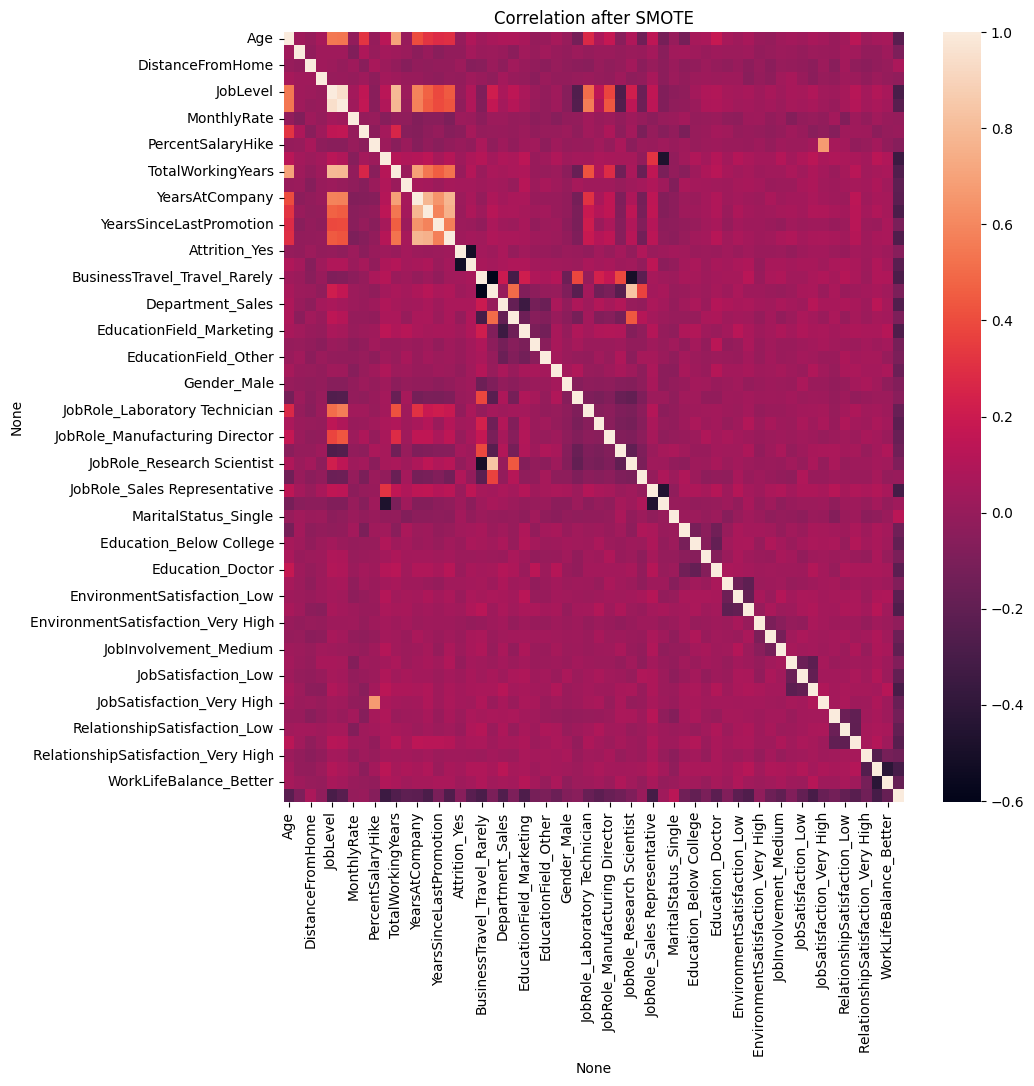

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
# creation of the artificial dataset and heatmap

from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy = "minority", random_state = 10)
X_art, y_art = sm.fit_resample(df.drop(columns = {"Attrition_Yes"}), df["Attrition_Yes"])
artificial_df = pd.concat([pd.DataFrame(X_art), pd.DataFrame(y_art)], axis = 1)
artificial_df.columns = [df.columns]


fig, ax = plt.subplots(figsize = (10,10))
ax = sns.heatmap(artificial_df.corr())
ax.set_title("Correlation after SMOTE")
plt.show()


### Loại bỏ các biến có hiện tượng đa cộng tuyến

In [15]:
corr = artificial_df.corr()

print("before Multi-check:", corr.shape)
for vars in corr:
    mask = (corr[[vars]] > 0.7) & (corr[[vars]] < 1) | (corr[[vars]] < -0.7)
    corr[mask] = np.nan
corr.dropna(inplace = True)
print("after Multi-check:", corr.shape)
# 9x rows got eliminated


before Multi-check: (58, 58)
after Multi-check: (49, 58)


In [16]:
df = df[corr.index.get_level_values(0)]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   DailyRate                           1470 non-null   int64
 1   DistanceFromHome                    1470 non-null   int64
 2   HourlyRate                          1470 non-null   int64
 3   MonthlyRate                         1470 non-null   int64
 4   NumCompaniesWorked                  1470 non-null   int64
 5   PercentSalaryHike                   1470 non-null   int64
 6   StockOptionLevel                    1470 non-null   int64
 7   TrainingTimesLastYear               1470 non-null   int64
 8   YearsSinceLastPromotion             1470 non-null   int64
 9   Attrition_Yes                       1470 non-null   bool 
 10  BusinessTravel_Travel_Frequently    1470 non-null   bool 
 11  BusinessTravel_Travel_Rarely        1470 non-null   bool 
 12  Depart

## Summary

Sau khi xem xét, có thể thấy số lượng đặc trưng ở cả 2 phương pháp là gần như nhau. Do đó, ta chọn các đặc trưng từ kết quả của phương pháp loại bỏ đa cộng tuyến để thực hiện huấn luyện mô hình.

In [18]:
def feature_selection(df: pd.DataFrame) -> pd.DataFrame:
    single_value_categoricals = []
    # single value categorical columns
    for col in categorical_columns:
      if df[col].nunique() == 1:
        single_value_categoricals.append(col)
    # Columns do not meet the variance threshold
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
    numerical_df = df[numerical_columns]
    threshold = 0.1
    selector = VarianceThreshold(threshold=threshold)
    rejected_features = selector.fit_transform(numerical_df)
    selected_features = numerical_df.columns[~selector.get_support()].tolist()
    # all columns
    all_cols = single_value_categoricals+ selected_features + ["EmployeeNumber"]

    print('Drop columns: ', all_cols)

    df.drop(columns = all_cols, inplace = True)
    # categorical encoding
    df = categorical_columns_encoding(df)
    # elimination of multicollinearity
    sm = SMOTE(sampling_strategy = "minority", random_state = 10)
    X_art, y_art = sm.fit_resample(df.drop(columns = {"Attrition_Yes"}), df["Attrition_Yes"])
    artificial_df = pd.concat([pd.DataFrame(X_art), pd.DataFrame(y_art)], axis = 1)
    artificial_df.columns = [df.columns]
    corr = artificial_df.corr()
    for vars in corr:
        mask = (corr[[vars]] > 0.7) & (corr[[vars]] < 1) | (corr[[vars]] < -0.7)
        corr[mask] = np.nan
    corr.dropna(inplace = True)
    df = df[corr.index.get_level_values(0)]
    print('Total columns: ',len(df.columns))

    return df

# Data Preprocessing

In [130]:
import numpy as np
import pandas as pd
url = 'https://raw.githubusercontent.com/TQuangNLe2003/DS102_HMTK/main/%C4%90%E1%BB%93%20%C3%81n/WA_Fn-UseC_-HR-Employee-Attrition.csv'
df = pd.read_csv(url)

In [131]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


## Drop duplicated

In [132]:
dup = df.duplicated().sum()
dup = dup[dup>0]
dup

array([], dtype=int64)

There is no duplicated data in dataset

## Missing imputation

In [133]:
missing = df.isnull().sum()
missing = missing[missing>0]
missing

Series([], dtype: int64)

There is no missing data in dataset

## Outliers cleaning

### Z-score

In [134]:
from scipy import stats
features = df.select_dtypes(include='number').columns.values
z = np.abs(stats.zscore(df[features]))
threshold = 3.5
df_zscore = df[(z < threshold).all(axis=1)]
df_zscore

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


### IQR

In [135]:
Q1 = df[features].quantile(0.25)
Q3 = df[features].quantile(0.75)
IQR = Q3 - Q1

df_iqr = df[
    ~((df[features] < (Q1 - 1.5*IQR))  | (df[features] > (Q3 + 1.5*IQR))).any(axis=1)
]
df_iqr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7
11,29,No,Travel_Rarely,153,Research & Development,15,2,Life Sciences,1,15,...,4,80,0,10,3,3,9,5,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,31,No,Non-Travel,325,Research & Development,5,3,Medical,1,2057,...,2,80,0,10,2,3,9,4,1,7
1464,26,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,...,4,80,0,5,2,3,4,2,0,0
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


The outliers account for approximately **50%** of the data point number. This percentage is **too high** to normally remove all the outliers. Therefore, we will consider using all of the data points.

## Original dataset

## Special Characters

In [136]:
from pandas.api.types import is_numeric_dtype
import re

# Find special characters

for col in df.select_dtypes(exclude='number').columns:
    if is_numeric_dtype(df[col]) == False:
        chars = []
        for i in range(len(df[col])):
            if type(df[col][i]) == str:
                chars.extend(re.findall("[^A-Za-z0-9]",df[col][i]))
        print(col, list(set(chars)))

Attrition []
BusinessTravel ['_', '-']
Department [' ', '&']
EducationField [' ']
Gender []
JobRole [' ']
MaritalStatus []
Over18 []
OverTime []


In [137]:
for col in df.select_dtypes(exclude='number').columns:
    print(col, df[col].unique())

Attrition ['Yes' 'No']
BusinessTravel ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department ['Sales' 'Research & Development' 'Human Resources']
EducationField ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender ['Female' 'Male']
JobRole ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus ['Single' 'Married' 'Divorced']
Over18 ['Y']
OverTime ['Yes' 'No']


## Feature Selection

In [138]:
df = feature_selection(df)
df

Drop columns:  ['Over18', 'EmployeeCount', 'StandardHours', 'EmployeeNumber']
Total columns:  49


,DailyRate,DistanceFromHome,HourlyRate,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,YearsSinceLastPromotion,Attrition_Yes,...,JobSatisfaction_Low,JobSatisfaction_Medium,JobSatisfaction_Very High,PerformanceRating_Outstanding,RelationshipSatisfaction_Low,RelationshipSatisfaction_Medium,RelationshipSatisfaction_Very High,WorkLifeBalance_Best,WorkLifeBalance_Better,WorkLifeBalance_Good
0,1102,1,94,19479,8,11,0,0,0,True,...,False,False,True,False,True,False,False,False,False,False
1,279,8,61,24907,1,23,1,3,1,False,...,False,True,False,True,False,False,True,False,True,False
2,1373,2,92,2396,6,15,0,3,0,True,...,False,False,False,False,False,True,False,False,True,False
3,1392,3,56,23159,1,11,0,3,3,False,...,False,False,False,False,False,False,False,False,True,False
4,591,2,40,16632,9,12,1,3,2,False,...,False,True,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,884,23,41,12290,4,17,1,3,0,False,...,False,False,True,False,False,False,False,False,True,False
1466,613,6,42,21457,4,15,1,5,1,False,...,True,False,False,False,True,False,False,False,True,False
1467,155,4,87,5174,1,20,1,0,0,False,...,False,True,False,True,False,True,False,False,True,False
1468,1023,2,63,13243,2,14,0,3,0,False,...,False,True,False,False,False,False,True,False,False,True


In [139]:
print(df.columns)

Index(['DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyRate',
       'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel',
       'TrainingTimesLastYear', 'YearsSinceLastPromotion', 'Attrition_Yes',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Male', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'OverTime_Yes',
       'Education_Below College', 'Education_College', 'Education_Doctor',
       'Education_Master', 'EnvironmentSatisfaction_Low',
       'EnvironmentSatisfaction_Medium', 'EnvironmentSatisfaction_Very High

## Feature Normalization

In [140]:
from sklearn.preprocessing import MinMaxScaler
scl = MinMaxScaler()

X = df.drop(columns=['Attrition_Yes'])
y = df['Attrition_Yes']

X = X.apply(lambda col: scl.fit_transform(col.values.reshape(-1,1)).flatten())
X

,DailyRate,DistanceFromHome,HourlyRate,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,YearsSinceLastPromotion,BusinessTravel_Travel_Frequently,...,JobSatisfaction_Low,JobSatisfaction_Medium,JobSatisfaction_Very High,PerformanceRating_Outstanding,RelationshipSatisfaction_Low,RelationshipSatisfaction_Medium,RelationshipSatisfaction_Very High,WorkLifeBalance_Best,WorkLifeBalance_Better,WorkLifeBalance_Good
0,0.715820,0.000000,0.914286,0.698053,0.888889,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.126700,0.250000,0.442857,0.916001,0.111111,0.857143,0.333333,0.500000,0.066667,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.909807,0.035714,0.885714,0.012126,0.666667,0.285714,0.000000,0.500000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.923407,0.071429,0.371429,0.845814,0.111111,0.000000,0.000000,0.500000,0.200000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.350036,0.035714,0.142857,0.583738,1.000000,0.071429,0.333333,0.500000,0.133333,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.559771,0.785714,0.157143,0.409396,0.444444,0.428571,0.333333,0.500000,0.000000,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.365784,0.178571,0.171429,0.777474,0.444444,0.285714,0.333333,0.833333,0.066667,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1467,0.037938,0.107143,0.814286,0.123670,0.111111,0.642857,0.333333,0.000000,0.000000,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1468,0.659270,0.035714,0.471429,0.447661,0.222222,0.214286,0.000000,0.500000,0.000000,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


## Splitting Data and Handling Imbalanced Data

Text(0.5, 1.0, 'Percentage of values by class')

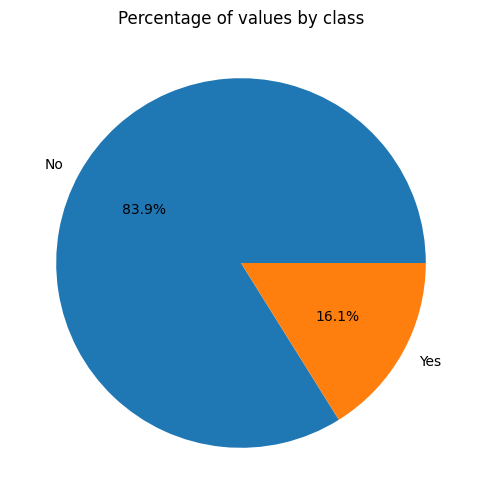

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(6,6))
plt.pie(x=y.value_counts().values, labels=['No','Yes'], autopct="%1.1f%%")
plt.title('Percentage of values by class')

$\rightarrow$ Imbalanced data

In [142]:
import os

imb_path = 'Processed Data/Imbalanced Data'
b_path = 'Processed Data/Imbalanced-Handled Data'

os.makedirs(imb_path,exist_ok=True)
os.makedirs(b_path,exist_ok=True)

In [143]:
from sklearn.model_selection import train_test_split, KFold

X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.3,shuffle=True,stratify=y, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid,y_valid, test_size=0.5, shuffle=True, random_state=42)

np.savez_compressed(imb_path + '/processed_data.npz',
                    X_train = X_train,
                    X_test = X_test,
                    X_valid = X_valid,
                    y_train = y_train,
                    y_test = y_test,
                    y_valid = y_valid)

In [144]:
y_train.value_counts()

Attrition_Yes
False    863
True     166
Name: count, dtype: int64

In [145]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(k_neighbors=10,random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

np.savez_compressed(b_path + '/processed_data.npz',
                    X_train = X_train,
                    X_test = X_test,
                    X_valid = X_valid,
                    y_train = y_train,
                    y_test = y_test,
                    y_valid = y_valid)

In [146]:
y_train.value_counts()

Attrition_Yes
False    863
True     863
Name: count, dtype: int64

# Model Building

### Nhập thư viện

In [35]:
import numpy as np
import pandas as pd
from sklearn.linear_model import *
from sklearn.neighbors import *
from sklearn.neural_network import *
from sklearn.tree import *
from sklearn.metrics import *
from sklearn.ensemble import *
from sklearn.svm import *
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report

### Đọc dữ liệu

In [147]:
u, b = np.load(imb_path + '/processed_data.npz'), np.load(b_path + '/processed_data.npz') # u = unbalanced, b = balanced
uX_train, uX_val, uX_test, uy_train, uy_val, uy_test =  u['X_train'], u['X_valid'], u['X_test'], u['y_train'], u['y_valid'], u['y_test']
bX_train, bX_val, bX_test, by_train, by_val, by_test =  b['X_train'], b['X_valid'], b['X_test'], b['y_train'], b['y_valid'], b['y_test']

In [37]:
choice = 'b'
if choice == 'u':
    X_train, y_train, X_val, y_val = uX_train, uy_train, uX_val, uy_val
else:
    X_train, y_train, X_val, y_val = bX_train, by_train, bX_val, by_val

### Mô hình

In [38]:
def evaluate(y_true, y_pred):
    return balanced_accuracy_score(y_true, [int(i > 0.5) for i in y_pred]), roc_auc_score(y_true, y_pred)

#### Mô hình tuyến tính (Logistic Regression)

In [39]:
LR = LogisticRegression(solver='liblinear')
LR.fit(X_train, y_train)
uLR = evaluate(y_val, LR.predict_proba(X_val)[:, 1])
uLR

(0.6690284779942772, 0.746559476767952)

#### Mô hình phân cụm (KNN, NCA + KNN)

##### KNN

In [40]:
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
uKNN = evaluate(y_val, KNN.predict_proba(X_val)[:, 1])
uKNN

(0.5806649407276196, 0.5926556751601035)

##### NCA + KNN

In [41]:
NCA = NeighborhoodComponentsAnalysis()
KNN = KNeighborsClassifier()
NCA.fit(X_train, y_train)
KNN.fit(NCA.transform(X_train), y_train)
uNCAKNN = evaluate(y_val, KNN.predict_proba(NCA.transform(X_val))[:, 1])
uNCAKNN

(0.6425943589044829, 0.6475677885270474)

#### Mô hình cây

##### Cây quyết định

In [42]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
utree = evaluate(y_val, tree.predict_proba(X_val)[:, 1])
utree

(0.4949584412045238, 0.4949584412045237)

##### Random Forest

In [43]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
uforest = evaluate(y_val, forest.predict_proba(X_val)[:, 1])
uforest

(0.5525957214879411, 0.6996184766316936)

##### CatBoost

In [44]:
cat = CatBoostClassifier()
cat.fit(X_train, y_train)
ucat = evaluate(y_val, cat.predict_proba(X_val)[:, 1])
ucat

Learning rate set to 0.01307
0:	learn: 0.6835305	total: 60.7ms	remaining: 1m
1:	learn: 0.6748774	total: 67.3ms	remaining: 33.6s
2:	learn: 0.6659605	total: 73.2ms	remaining: 24.3s
3:	learn: 0.6568668	total: 77.5ms	remaining: 19.3s
4:	learn: 0.6497929	total: 81.2ms	remaining: 16.2s
5:	learn: 0.6426152	total: 85.2ms	remaining: 14.1s
6:	learn: 0.6362476	total: 89ms	remaining: 12.6s
7:	learn: 0.6306933	total: 92.2ms	remaining: 11.4s
8:	learn: 0.6244329	total: 95.4ms	remaining: 10.5s
9:	learn: 0.6179933	total: 98.4ms	remaining: 9.74s
10:	learn: 0.6107217	total: 102ms	remaining: 9.14s
11:	learn: 0.6047082	total: 105ms	remaining: 8.64s
12:	learn: 0.5969031	total: 108ms	remaining: 8.2s
13:	learn: 0.5908841	total: 111ms	remaining: 7.82s
14:	learn: 0.5853823	total: 114ms	remaining: 7.5s
15:	learn: 0.5802998	total: 118ms	remaining: 7.23s
16:	learn: 0.5743140	total: 121ms	remaining: 6.99s
17:	learn: 0.5676917	total: 124ms	remaining: 6.75s
18:	learn: 0.5620431	total: 127ms	remaining: 6.54s
19:	learn

(0.5985829132034337, 0.7445156015805968)

##### LGBM

In [45]:
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
ulgbm = evaluate(y_val, lgbm.predict_proba(X_val)[:, 1])
ulgbm

[LightGBM] [Info] Number of positive: 873, number of negative: 873
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001917 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4367
[LightGBM] [Info] Number of data points in the train set: 1746, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


(0.5863877912522142, 0.7094972067039106)

##### AdaBoost

In [46]:
ada = RandomForestClassifier()
ada.fit(X_train, y_train)
uada = evaluate(y_val, ada.predict_proba(X_val)[:, 1])
uada

(0.5647908434391606, 0.6977789889630739)

##### XGBoost

In [47]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
uxgb = evaluate(y_val, xgb.predict_proba(X_val)[:, 1])
uxgb

(0.5835944951628287, 0.7244856247445156)

#### SVM

In [48]:
svm = SVC(probability=True)
svm.fit(X_train, y_train)
usvm = evaluate(y_val, svm.predict_proba(X_val)[:, 1])
usvm

(0.600626788390789, 0.6957351137757187)

#### Mạng học sâu

##### MLP

In [49]:
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
umlp = evaluate(y_val, mlp.predict_proba(X_val)[:, 1])
umlp

c:\Users\Duong\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


(0.6326474996593541, 0.7295271835399919)

### In kết quả

In [50]:
col_names = [["Mô hình tuyến tính", "Logistic Regression"],
                             ["Mô hình phân cụm", "KNN"],
                             ["Mô hình phân cụm", "NCA + KNN"],
                             ["Mô hình cây", "Cây quyết định"],
                             ["Mô hình cây", "Random Forest"],
                             ["Mô hình cây", "CatBoost"],
                             ["Mô hình cây", "LGBM"],
                             ["Mô hình cây", "AdaBoost"],
                             ["Mô hình cây", "XGBoost"],
                             ["Support Vector Machine", ""],
                             ["Mô hình học sâu", "MLP"]]
result = [uLR, uKNN, uNCAKNN, utree, uforest, ucat, ulgbm, uada, uxgb, usvm, umlp]
acc = [i[0] for i in result]
auc_roc = [i[1] for i in result]

In [51]:
column_names = pd.DataFrame(col_names, columns=["", ""])

rows = [acc, auc_roc]

columns = pd.MultiIndex.from_frame(column_names)
index = ["Balanced Accuracy", "AUC ROC"]

df = pd.DataFrame(rows, columns=columns, index=index)

df = df.style.set_properties(**{
    'font-size': '11pt','border': '1.3px solid black', 'text-align': 'center', 'colheader_justify': 'center'
}).set_table_styles([
    {'selector': 'th.col_heading, th.row_heading','props': [('border', '1.3px black solid')]},
    {'selector': 'th','props': [('text-align', 'center'), ('font-size', '9pt')]}]
)

display(df)

# Run all model

In [81]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pickle

In [191]:
def run_all_model(choice='b', models = None):
    models_path = 'models/'+choice+'/'
    os.makedirs(models_path, exist_ok=True)
    if choice == 'u':
        X_train, y_train, X_val, y_val = uX_train, uy_train, uX_val, uy_val
    else:
        X_train, y_train, X_val, y_val = bX_train, by_train, bX_val, by_val

    if models is None:
        models = {
            "Logistic Regression": LogisticRegression(solver='liblinear'),
            "KNN": KNeighborsClassifier(),
            "NCA + KNN": KNeighborsClassifier(),
            "Decision Tree": DecisionTreeClassifier(),
            "Random Forest": RandomForestClassifier(),
            "CatBoost": CatBoostClassifier(),
            "LGBM": LGBMClassifier(),
            "AdaBoost": AdaBoostClassifier(),
            "XGBoost": XGBClassifier(),
            "SVM": SVC(probability=True),
            "MLP": MLPClassifier()
        }

    reports = {
        'Model': [],
        'Accuracy': [],
        'True Positive Rate (Recall)': [],
        'True Negative Rate (Specificity)': []
    }

    for name, model in models.items():
        if name == "NCA + KNN":
            from sklearn.neighbors import NeighborhoodComponentsAnalysis
            NCA = NeighborhoodComponentsAnalysis()
            NCA.fit(X_train, y_train)
            model.fit(NCA.transform(X_train), y_train)
            y_pred = model.predict(NCA.transform(X_val))
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_val)
        
        # Save results
        reports['Model'].append(name)
        reports['Accuracy'].append(accuracy_score(y_pred=y_pred, y_true=y_val))
        reports['True Positive Rate (Recall)'].append(recall_score(y_pred=y_pred, y_true=y_val))
        cm = confusion_matrix(y_pred=y_pred, y_true=y_val)
        TN = cm[0, 0]
        FP = cm[0, 1]
        reports['True Negative Rate (Specificity)'].append(TN / (TN + FP))
        
        # Save model
        with open(models_path+name+'.pkl', 'wb') as file:
            pickle.dump(model, file)

    # Save classification reports to CSV
    results_path = str(choice) + '-all_reports.csv'
    pd.DataFrame(reports).to_csv(results_path, index=False)

# Model Evaluation

In [ ]:
def evaluate_model(model, X_val, y_val):
    y_pred = model.predict(X_val)
    print("Classification Report:")
    print(classification_report(y_val, y_pred))

    # Vẽ ma trận nhầm lẫn
    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

    # Vẽ biểu đồ ROC và tính AUC
    y_pred_proba = model.predict_proba(X_val)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

# Khởi tạo các mô hình
models = {
    "Logistic Regression": LogisticRegression(C= 10, penalty = 'l2', solver= 'newton-cg'),
    "KNN": KNeighborsClassifier(metric = 'manhattan', n_neighbors = 3, weights = 'distance'),
    "NCA + KNN": KNeighborsClassifier(metric = 'manhattan', n_neighbors = 3, weights = 'distance'),
    "Decision Tree": DecisionTreeClassifier(criterion= 'gini', max_depth= 10, max_features= None, min_samples_leaf= 1, min_samples_split= 2),
    "Random Forest": RandomForestClassifier(criterion= 'gini', max_depth= 10, max_features= 2, min_samples_leaf= 1, min_samples_split= 2),
    "CatBoost": CatBoostClassifier(),
    "LGBM": LGBMClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(),
    "SVM": SVC(probability=True, C=10, kernel= 'rbf'),
    "MLP": MLPClassifier(alpha= 0.0001, hidden_layer_sizes= 200, learning_rate= 'constant')
}

# Đánh giá các mô hình
results = {}
reports = {}

for model_name, model in models.items():
    if model_name == "NCA + KNN":
        # Áp dụng NCA nếu cần
        nca = NeighborhoodComponentsAnalysis()
        nca.fit(X_train, y_train)
        model.fit(nca.transform(X_train), y_train)
        X_val_transformed = nca.transform(X_val)
    else:
        model.fit(X_train, y_train)
        X_val_transformed = X_val

    print(f"Evaluating model: {model_name}")
    evaluate_model(model, X_val_transformed, y_val)

    y_pred = model.predict(X_val_transformed)
    y_proba = model.predict_proba(X_val_transformed)[:, 1]

    results[model_name] = evaluate(y_val, y_proba)
    reports[model_name] = classification_report(y_val, y_pred, output_dict=True)
    print("\n")

# In báo cáo phân loại
for model_name, report in reports.items():
    print(f"Classification report for {model_name}:")
    print(pd.DataFrame(report).transpose())
    print("\n")

# Hiển thị balanced accuracy
col_names = [
    ["Mô hình tuyến tính", "Logistic Regression"],
    ["Mô hình phân cụm", "KNN"],
    ["Mô hình phân cụm", "NCA + KNN"],
    ["Mô hình cây", "Cây quyết định"],
    ["Mô hình cây", "Random Forest"],
    ["Mô hình cây", "CatBoost"],
    ["Mô hình cây", "LGBM"],
    ["Mô hình cây", "AdaBoost"],
    ["Mô hình cây", "XGBoost"],
    ["Support Vector Machine", ""],
    ["Mô hình học sâu", "MLP"]
]
result = [results[name] for name in models.keys()]
acc = [i[0] for i in result]
roc = [i[1] for i in result]
column_names = pd.DataFrame(col_names, columns=["", ""])
rows = [acc, roc]

columns = pd.MultiIndex.from_frame(column_names)
index = ["Balanced Accuracy", "AUC ROC"]
df = pd.DataFrame(rows, columns=columns, index=index)

df = df.style.set_properties(**{
    'font-size': '11pt','border': '1.3px solid black', 'text-align': 'center', 'colheader_justify': 'center'
}).set_table_styles([
    {'selector': 'th.col_heading, th.row_heading','props': [('border', '1.3px black solid')]},
    {'selector': 'th','props': [('text-align', 'center'), ('font-size', '9pt')]}]
)

display(df)

In [172]:
run_all_model('b')
pd.read_csv('b-all_reports.csv')

Learning rate set to 0.013006
0:	learn: 0.6877681	total: 6.23ms	remaining: 6.23s
1:	learn: 0.6806384	total: 10.2ms	remaining: 5.1s
2:	learn: 0.6725470	total: 14.4ms	remaining: 4.79s
3:	learn: 0.6661163	total: 18.6ms	remaining: 4.62s
4:	learn: 0.6599339	total: 22ms	remaining: 4.38s
5:	learn: 0.6531031	total: 24.8ms	remaining: 4.11s
6:	learn: 0.6452134	total: 30.3ms	remaining: 4.3s
7:	learn: 0.6378724	total: 33.5ms	remaining: 4.15s
8:	learn: 0.6318418	total: 37.1ms	remaining: 4.08s
9:	learn: 0.6249522	total: 40.2ms	remaining: 3.98s
10:	learn: 0.6179807	total: 43.7ms	remaining: 3.93s
11:	learn: 0.6119966	total: 50.4ms	remaining: 4.15s
12:	learn: 0.6068923	total: 54ms	remaining: 4.1s
13:	learn: 0.6008979	total: 57.8ms	remaining: 4.07s
14:	learn: 0.5951229	total: 61.2ms	remaining: 4.02s
15:	learn: 0.5914643	total: 65.1ms	remaining: 4.01s
16:	learn: 0.5858118	total: 69.8ms	remaining: 4.04s
17:	learn: 0.5810174	total: 72.4ms	remaining: 3.95s
18:	learn: 0.5747685	total: 76.2ms	remaining: 3.93s

c:\Users\Duong\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Duong\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,Model,Accuracy,True Positive Rate (Recall),True Negative Rate
0,Logistic Regression,0.813636,0.636364,0.844920
1,KNN,0.604545,0.666667,0.593583
2,NCA + KNN,0.722727,0.303030,0.796791
3,Decision Tree,0.836364,0.333333,0.925134
4,Random Forest,0.877273,0.212121,0.994652
5,CatBoost,0.863636,0.242424,0.973262
6,LGBM,0.863636,0.272727,0.967914
7,AdaBoost,0.818182,0.393939,0.893048
8,XGBoost,0.868182,0.272727,0.973262
9,SVM,0.872727,0.333333,0.967914


**Nhận xét** 
* Accuracy của các mô hình gần như tương tự nhau.
* Bài toán ban đầu là dự đoán khả năng nghỉ việc của nhân việc, do đó ta mong muốn mô hình phải dự đoán đúng các nhiều trường hợp có khả năng nghỉ việc (tức là không hài lòng với công việc) càng tốt, cũng như các trường hợp hài lòng với công việc.
* Chính vì vậy, ngoài độ chính xác, ta cần quan tâm đến 2 giá trị là **True Positive Rate - Recall** và **True Negative Rate - Specificity**.

# Fine Tuning

Lựa chọn mô hình:
* Random Forest
* CatBoost
* LightGBM
* XGBoost
* SVM
* MLP
* Logistic Regression
* Decision Tree
* AdaBoost

In [186]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'RandomForest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'criterion': ['gini', 'entropy']
    },
    'CatBoost': {
        'iterations': [100, 200, 300],
        'depth': [4, 6, 8],
        'learning_rate': [0.01, 0.1, 0.2]
    },
    'LightGBM': {
        'n_estimators': [100, 200, 300],
        'max_depth': [-1, 10, 20, 30],
        'learning_rate': [0.01, 0.1, 0.2]
    },
    'XGBoost': {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 6, 9],
        'learning_rate': [0.01, 0.1, 0.2]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    'MLP': {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['relu', 'tanh'],
        'learning_rate': ['constant', 'adaptive']
    },
    'LogisticRegression': {
        'C': [0.1, 1, 10],
        'penalty': ['l2'],
        'solver': ['lbfgs', 'liblinear']
    },
    'DecisionTree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'criterion': ['gini', 'entropy']
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1]
    }
}

models = {
    'RandomForest': RandomForestClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0),
    'LightGBM': LGBMClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    'SVM': SVC(),
    'MLP': MLPClassifier(max_iter=1000),
    'LogisticRegression': LogisticRegression(),
    'DecisionTree': DecisionTreeClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

# Định nghĩa các scorers
scorers = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score),
    'specificity': make_scorer(specificity_score)
}

selected_models = dict()

for model_name, model in models.items():
    print(f"Running GridSearchCV for {model_name}...")
    grid_search = GridSearchCV(estimator=models[model_name], param_grid=param_grid[model_name], scoring=scorers, refit='accuracy', cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    selected_models[model_name] = type(model)(**grid_search.best_params_)

Running GridSearchCV for RandomForest...
Fitting 5 folds for each of 72 candidates, totalling 360 fits


Running GridSearchCV for CatBoost...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Running GridSearchCV for LightGBM...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 863, number of negative: 863
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001880 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3818
[LightGBM] [Info] Number of data points in the train set: 1726, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Running GridSearchCV for XGBoost...
Fitting 5 folds for each of 27 candidates, totalling 135 fits


c:\Users\Duong\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:46:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Running GridSearchCV for SVM...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Running GridSearchCV for MLP...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Running GridSearchCV for LogisticRegression...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Running GridSearchCV for DecisionTree...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Running GridSearchCV for AdaBoost...
Fitting 5 folds for each of 9 candidates, totalling 45 fits


c:\Users\Duong\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [194]:
run_all_model('b',models=selected_models)
pd.read_csv('b-all_reports.csv')

0:	learn: 0.6874013	total: 11.1ms	remaining: 3.33s
1:	learn: 0.6819454	total: 21ms	remaining: 3.13s
2:	learn: 0.6753609	total: 32.5ms	remaining: 3.22s
3:	learn: 0.6684950	total: 42.1ms	remaining: 3.12s
4:	learn: 0.6620092	total: 53ms	remaining: 3.13s
5:	learn: 0.6554576	total: 63.6ms	remaining: 3.12s
6:	learn: 0.6485558	total: 72.6ms	remaining: 3.04s
7:	learn: 0.6424476	total: 83.4ms	remaining: 3.04s
8:	learn: 0.6368174	total: 92.2ms	remaining: 2.98s
9:	learn: 0.6307721	total: 102ms	remaining: 2.95s
10:	learn: 0.6243005	total: 110ms	remaining: 2.9s
11:	learn: 0.6182252	total: 120ms	remaining: 2.89s
12:	learn: 0.6125977	total: 132ms	remaining: 2.92s
13:	learn: 0.6077040	total: 140ms	remaining: 2.87s
14:	learn: 0.6015989	total: 150ms	remaining: 2.85s
15:	learn: 0.5954073	total: 159ms	remaining: 2.82s
16:	learn: 0.5898489	total: 167ms	remaining: 2.78s
17:	learn: 0.5847141	total: 175ms	remaining: 2.74s
18:	learn: 0.5795948	total: 185ms	remaining: 2.74s
19:	learn: 0.5749962	total: 194ms	rem

c:\Users\Duong\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Duong\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


,Model,Accuracy,True Positive Rate (Recall),True Negative Rate (Specificity)
0,RandomForest,0.859091,0.121212,0.989305
1,CatBoost,0.886364,0.303030,0.989305
2,LightGBM,0.854545,0.242424,0.962567
3,XGBoost,0.845455,0.212121,0.957219
4,SVM,0.863636,0.272727,0.967914
5,MLP,0.840909,0.303030,0.935829
6,LogisticRegression,0.813636,0.636364,0.844920
7,DecisionTree,0.790909,0.242424,0.887701
8,AdaBoost,0.840909,0.545455,0.893048


# Final Results

Ở đây ta xem xét các kết quả trên tập test

In [196]:
models = ['Random Forest', 'CatBoost', 'LGBM', 'XGBoost', 'SVM', 'AdaBoost', 'MLP', 'Logistic Regression', 'Decision Tree']

In [200]:
def load_result(choice='b'):
    
    df = {
        'Model': [],
        'Accuracy': [],
        'Recall': [],
        'Specificity': [],
    }
    
    for model_name in models:
        print('Model: ',model_name)
        df['Model'].append(model_name)
        
        with open('models/'+ choice + '/' + model_name +'.pkl', 'rb') as file:
            model = pickle.load(file)
            
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
        df['Accuracy'].append(accuracy_score(y_true=y_test, y_pred=y_pred))
        df['Recall'].append(recall_score(y_true=y_test, y_pred=y_pred))
        TN = cm[0, 0]
        FP = cm[0, 1]
        df['Specificity'].append(TN / (TN + FP))
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.xlabel('Predicted labels')
        plt.ylabel('True labels')
        plt.title('Confusion Matrix')
        plt.show()
    
    display(pd.DataFrame(df))

Model:  Random Forest


c:\Users\Duong\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


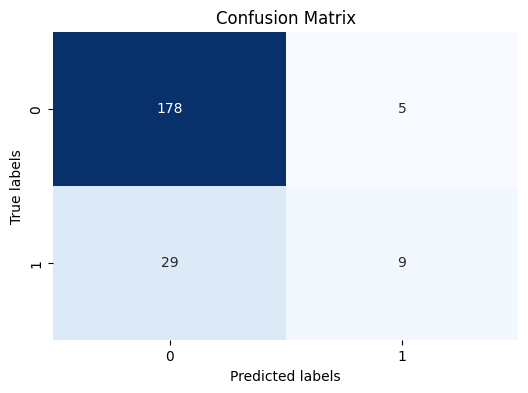

Model:  CatBoost


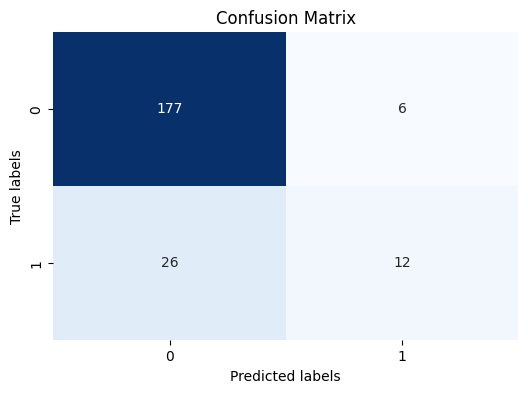

Model:  LGBM


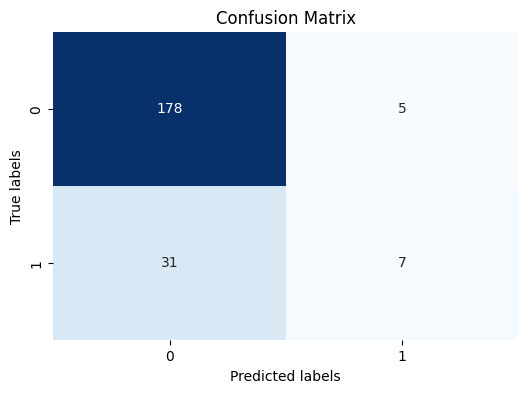

Model:  XGBoost


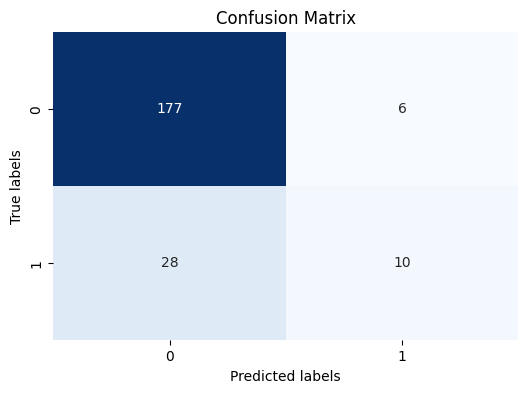

Model:  SVM


c:\Users\Duong\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


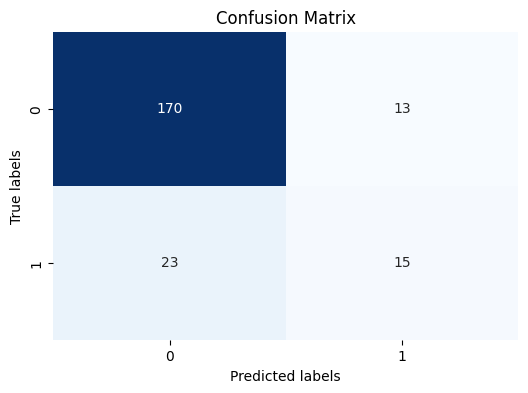

Model:  AdaBoost


c:\Users\Duong\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


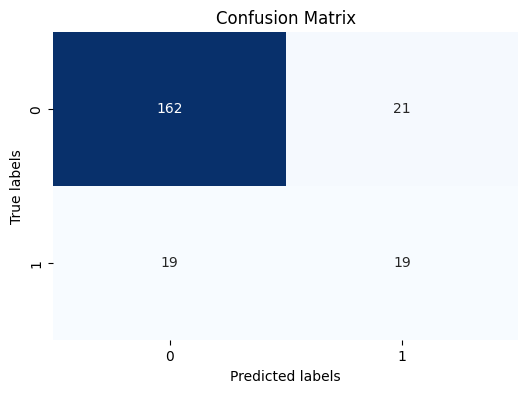

Model:  MLP


c:\Users\Duong\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


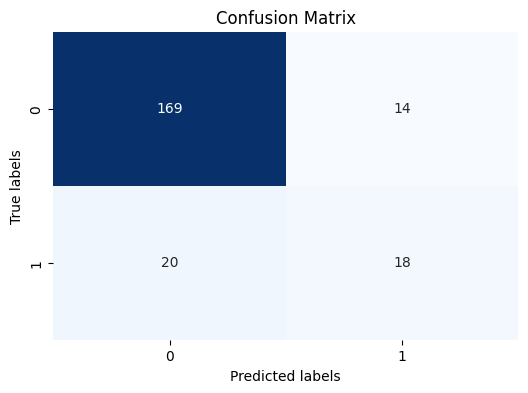

Model:  Logistic Regression


c:\Users\Duong\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


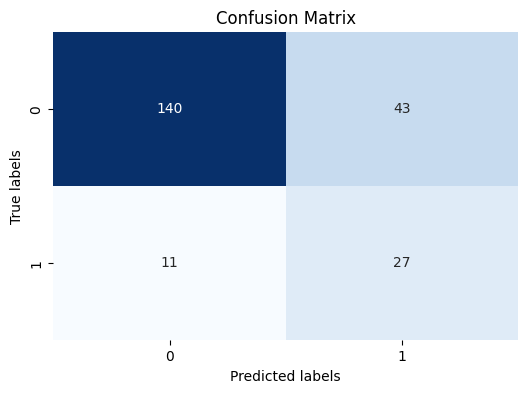

Model:  Decision Tree


c:\Users\Duong\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


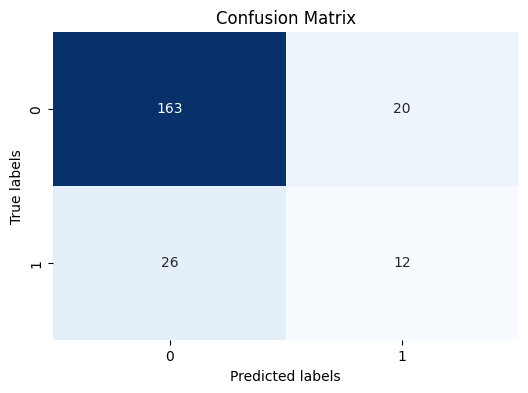

,Model,Accuracy,Recall,Specificity
0,Random Forest,0.846154,0.236842,0.972678
1,CatBoost,0.855204,0.315789,0.967213
2,LGBM,0.837104,0.184211,0.972678
3,XGBoost,0.846154,0.263158,0.967213
4,SVM,0.837104,0.394737,0.928962
5,AdaBoost,0.819005,0.500000,0.885246
6,MLP,0.846154,0.473684,0.923497
7,Logistic Regression,0.755656,0.710526,0.765027
8,Decision Tree,0.791855,0.315789,0.890710


In [201]:
load_result('b')

**Nhận xét**
* Mô hình CatBoost cho độ chính xác cao nhất
* Mô hình Logistic Regression cho độ chính xác thấp nhất, nhưng cho giá trị Recall score cao nhất
* Xem xét tất cả các điểm đánh giá, 2 mô hình AdaBoosting và MLP (Multi Layer Perceptron) cho kết quả tốt nhất
